In [1]:
import numpy as np
import h5py 
import cv2
import matplotlib.pyplot as plt

import sys
# add parent directory to path
sys.path.append('../')
from aggregate_statistics import get_rosettes, make_rosette_images

path = '../../CodePass2/runs/'
path = "D:/"
with h5py.File(path+'finale_normal.hdf5', 'r') as f:
    # read the data
    positions = f['x'][:]
    properties = f['properties'][:][0]
    p = f['p'][:]


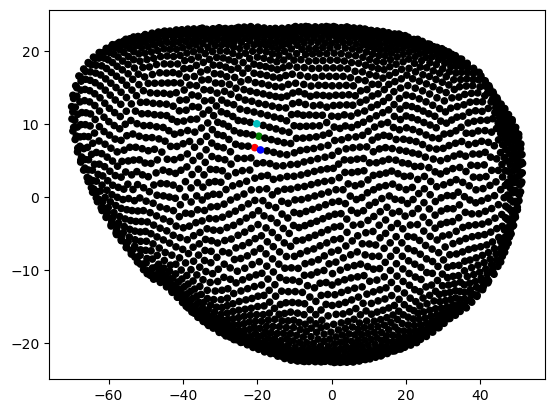

In [8]:
allids = properties
cc = []
for i in range(len(properties)):
    if i == 786:
        cc.append('r')
    elif i == 2346:
        cc.append('g')
    elif i == 2243:
        cc.append('b')
    elif i == 4388:
        cc.append('c')
    else:
        cc.append('k')
xx,yy,zz = positions[10,:,0], positions[10,:,1], positions[10,:,2]

plt.scatter(xx[yy<0], zz[yy<0], c=np.array(cc)[yy<0], s=20)

In [13]:
# get the rosettes
rosettes = get_rosettes(positions, properties, [1], 10, max_dist =  3)
counts, vecs_between = rosettes
vecs_between = np.array(vecs_between)

# # save the rosettes
# np.save('rosettes.npy', rosettes)
# # save the vecs_between
# np.save('vecs_between.npy', vecs_between)

100%|██████████| 299/299 [06:34<00:00,  1.32s/it]


In [3]:
# save the rosettes
np.save('rosettes.npy', rosettes)
# save the vecs_between
np.save('vecs_between.npy', np.array(vecs_between))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

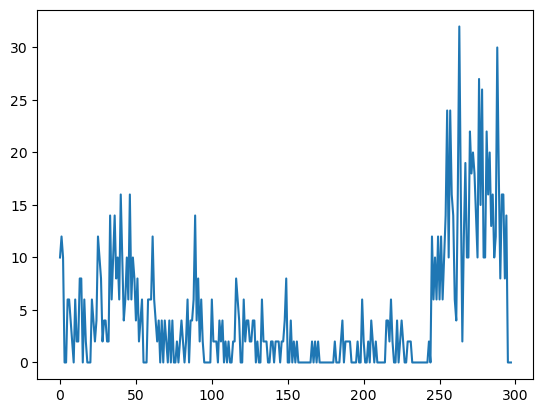

In [22]:
plt.plot(counts.sum(axis=1)[2:])

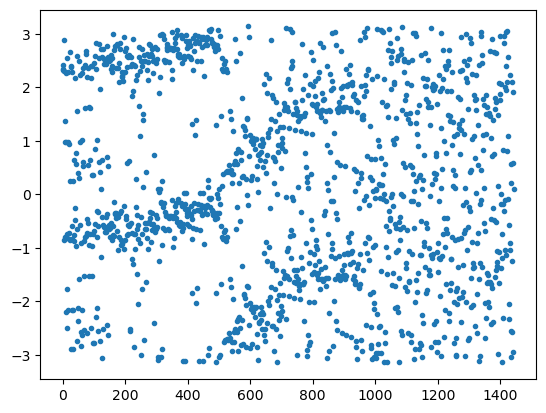

In [23]:
xx, yy, zz = vecs_between.T
usable = np.abs(zz) > np.abs(yy)
# angles = np.arctan2(zz[usable], xx[usable])
angles = np.arctan2(zz, xx)
plt.plot((angles),'.')


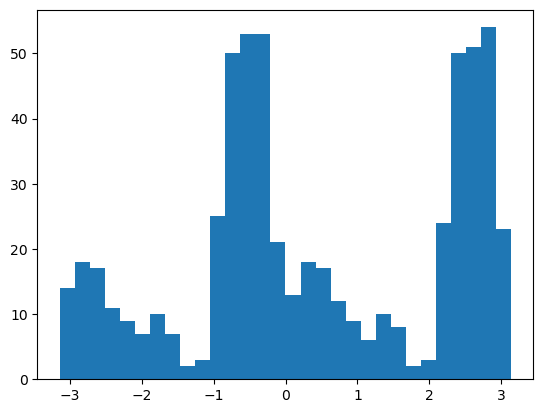

In [20]:
plt.hist(angles[:600], bins=30)
plt.show()